<a href="https://colab.research.google.com/github/poojak-shetty/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**

Sentiment Analysis is a technique used in text mining. It is described as a text mining technique for analyzing the underlying sentiment of a text message, i.e., a tweet. Twitter Sentiment Analysis, therefore means, using advanced text mining techniques to analyze the sentiment of the text (here, tweet) in the form of positive, negative and neutral. It is also known as Opinion Mining,which is primarily for analyzing conversations, opinions, and sharing of views (all in the form of tweets) for deciding business strategy, political analysis, and also for assessing public actions.
As we all know NLP deals with analyzing, understanding and generating the languages that humans use naturally in order to interface with computers in both written and spoken contexts using natural human languages instead of computer languages.Here we are using natural language processing techniques to do Sentiment Analysis of the tweets.

**ABOUT THE DATASET**

Our twitter sentiment analysis dataset is from [Kaggle-Twitter dataset](https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech?select=test.csv)

The objective of this project is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where **label '1' denotes the tweet is racist/sexist** and **label '0' denotes the tweet is not racist/sexist**, our objective is to predict the labels on the test dataset.

# **DATA PROCESSING AND CLEANING**

**IMPORTING NECESSARY LIBRARIES**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras  
import tensorflow_datasets as tfds

**LOADING THE DATASET**





In [0]:
df=pd.read_csv("train.csv")
df1=pd.read_csv("test.csv")

In [0]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


Train dataset has 3 columns(id,label and tweet).

In [0]:
df1

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


Test dataset has 2 columns(id and tweet).

In [0]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


In [0]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB
None


Let's start with the datacleaning process.

In [0]:
import re
#import regular expression

**REMOVING @user FROM ALL  THE TWEETS**

In [0]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [0]:
df['tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df1['tweet'] = np.vectorize(remove_pattern)(df1['tweet'], "@[\w]*")

In [0]:
df.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


**CHANGING ALL THE TWEETS INTO LOWERCASE.**

In [0]:
df['tweet']=df['tweet'].str.lower()
df1['tweet']=df1['tweet'].str.lower()

In [0]:
df.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


**CHANGE APOSTROPHE**

In [0]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"'cause": 'because',
 "ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [0]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [0]:
df['tweet'] = df['tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))
df1['tweet'] = df1['tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))

**CHANGE THE EMOJIS**

In [0]:
emotion_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":o": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [0]:
emotion_dict

{'8-)': 'happy',
 ':(': 'sad',
 ':)': 'happy',
 ':-(': 'sad',
 ':-3': 'happy',
 ':-< ': 'sad',
 ':->': 'happy',
 ':-[': 'sad',
 ':-]': 'happy',
 ':-c': 'sad',
 ':-||': 'sad',
 ':-}': 'happy',
 ':<': 'sad',
 ':[': 'sad',
 ':^)': 'happy',
 ':c': 'sad',
 ':c)': 'happy',
 ':o': 'happy',
 ':o)': 'happy',
 ':{': 'sad',
 ':‑)': 'happy',
 '<3': 'happy',
 '=)': 'happy',
 '=]': 'happy',
 '>:(': 'sad',
 '>:[': 'sad'}

In [0]:
df['tweet'] = df['tweet'].apply(lambda x: lookup_dict(x,emotion_dict))
df1['tweet'] = df1['tweet'].apply(lambda x: lookup_dict(x,emotion_dict))

In [0]:
df.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i cannot use cause t...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [0]:
df1.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


**REPLACING PUNCTUATIONS WITH SPACE**

In [0]:
df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
df1['tweet'] = df1['tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))

In [0]:
df.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i cannot use cause t...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in ...
4,5,0,factsguide society now motivation


In [0]:
df1.head()

,id,tweet
0,31963,studiolife aislife requires passion dedic...
1,31964,white supremacists want everyone to see th...
2,31965,safe ways to heal your acne altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,3rd bihday to my amazing hilarious nephew...


**REPLACING SPECIAL CHARACTER WITH SPACES**

In [0]:
df['tweet'] =df['tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
df1['tweet'] =df1['tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))

In [0]:
df1.head()

,id,tweet
0,31963,studiolife aislife requires passion dedic...
1,31964,white supremacists want everyone to see th...
2,31965,safe ways to heal your acne altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,3rd bihday to my amazing hilarious nephew...


**REPLACING NUMBERS WITH SPACES**

In [0]:
df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
df1['tweet'] = df1['tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))

In [0]:
df1.head()

,id,tweet
0,31963,studiolife aislife requires passion dedic...
1,31964,white supremacists want everyone to see th...
2,31965,safe ways to heal your acne altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,rd bihday to my amazing hilarious nephew...


**REMOVING WORDS WHOM LENGTH IS 1**

In [0]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
df1['tweet'] = df1['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

In [0]:
df.head()

,id,label,tweet
0,1,0,when father is dysfunctional and is so selfish...
1,2,0,thanks for lyft credit cannot use cause they d...
2,3,0,bihday your majesty
3,4,0,model love take with all the time in ur
4,5,0,factsguide society now motivation


We are using word tokenizer now.The output of word tokenization can be converted to Data Frame for better text understanding.It is  provided as input for further text cleaning steps such as  numeric character removal or stemming.

In [0]:
# Importing word tokenizer
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
df['tweet_token'] = df['tweet'].apply(lambda x: word_tokenize(x))
df1['tweet_token'] = df1['tweet'].apply(lambda x: word_tokenize(x))

Creating token for tweet.

In [0]:
df.head()

,id,label,tweet,tweet_token
0,1,0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,..."
1,2,0,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,model love take with all the time in ur,"[model, love, take, with, all, the, time, in, ur]"
4,5,0,factsguide society now motivation,"[factsguide, society, now, motivation]"


In [0]:
df1.head()

,id,tweet,tweet_token
0,31963,studiolife aislife requires passion dedication...,"[studiolife, aislife, requires, passion, dedic..."
1,31964,white supremacists want everyone to see the ne...,"[white, supremacists, want, everyone, to, see,..."
2,31965,safe ways to heal your acne altwaystoheal heal...,"[safe, ways, to, heal, your, acne, altwaystohe..."
3,31966,is the hp and the cursed child book up for res...,"[is, the, hp, and, the, cursed, child, book, u..."
4,31967,rd bihday to my amazing hilarious nephew eli a...,"[rd, bihday, to, my, amazing, hilarious, nephe..."


# ***STEMMING***

Stemming is a technique used to extract the base form of the words by removing affixes from them. It is just like cutting down the branches of a tree to its stems. For example, the stem of the words eating, eats, eaten is eat.

**Porter stemming algorithm**
is one of the most common stemming algorithms which is basically designed to remove and replace well-known suffixes of English words.

We are using **PorterStemmer class** which can easily implement Porter Stemmer algorithms for the word we want to stem.

This class knows several regular word forms and suffixes with the help of which it can transform the input word to a final stem. The resulting stem is often a shorter word having the same root meaning.

In [0]:
import nltk

Removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach.

In [0]:
# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [0]:
df['tweet_stem'] = df['tweet_token'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))

In [0]:
df1['tweet_stem'] = df1['tweet_token'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))

In [0]:
df.head()

,id,label,tweet,tweet_token,tweet_stem
0,1,0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...",when father is dysfunct and is so selfish he d...
1,2,0,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...",thank for lyft credit can not use caus they do...
2,3,0,bihday your majesty,"[bihday, your, majesty]",bihday your majesti
3,4,0,model love take with all the time in ur,"[model, love, take, with, all, the, time, in, ur]",model love take with all the time in ur
4,5,0,factsguide society now motivation,"[factsguide, society, now, motivation]",factsguid societi now motiv


In [0]:
df1.head()

,id,tweet,tweet_token,tweet_stem
0,31963,studiolife aislife requires passion dedication...,"[studiolife, aislife, requires, passion, dedic...",studiolif aislif requir passion dedic willpow ...
1,31964,white supremacists want everyone to see the ne...,"[white, supremacists, want, everyone, to, see,...",white supremacist want everyon to see the new ...
2,31965,safe ways to heal your acne altwaystoheal heal...,"[safe, ways, to, heal, your, acne, altwaystohe...",safe way to heal your acn altwaystoh healthi heal
3,31966,is the hp and the cursed child book up for res...,"[is, the, hp, and, the, cursed, child, book, u...",is the hp and the curs child book up for reser...
4,31967,rd bihday to my amazing hilarious nephew eli a...,"[rd, bihday, to, my, amazing, hilarious, nephe...",rd bihday to my amaz hilari nephew eli ahmir u...


The suffices have been removed now.

# **LEMMETIZATION**

Lemmatization technique is like stemming. The output we will get after lemmatization is called ‘lemma’, which is a root word rather than root stem, the output of stemming. After lemmatization, we will be getting a valid word that means the same thing.

NLTK provides WordNetLemmatizer class which is a thin wrapper around the wordnet corpus. This class uses morphy() function to the WordNet CorpusReader class to find a lemma. For example,Lemmetization of 'books' is **book** and Lemmatization of 'eating' is **eating**.Lemmatization considers the context and converts the word to its meaningful base form.Whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.We used stemming in this process to remove all the unnecessary suffices.But,the words might have lost their meaning too.So,we have kept different columns for stemming and lemmatization.

In [0]:
# Importing library for lemmatizing
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
df['tweet_lemm'] = df['tweet_token'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
df1['tweet_lemm'] = df1['tweet_token'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))

In [0]:
df.head()

,id,label,tweet,tweet_token,tweet_lemm
0,1,0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...",when father is dysfunctional and is so selfish...
1,2,0,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...",thanks for lyft credit can not use cause they ...
2,3,0,bihday your majesty,"[bihday, your, majesty]",bihday your majesty
3,4,0,model love take with all the time in ur,"[model, love, take, with, all, the, time, in, ur]",model love take with all the time in ur
4,5,0,factsguide society now motivation,"[factsguide, society, now, motivation]",factsguide society now motivation


In [0]:
df1.head()

,id,tweet,tweet_token,tweet_lemm
0,31963,studiolife aislife requires passion dedication...,"[studiolife, aislife, requires, passion, dedic...",studiolife aislife requires passion dedication...
1,31964,white supremacists want everyone to see the ne...,"[white, supremacists, want, everyone, to, see,...",white supremacist want everyone to see the new...
2,31965,safe ways to heal your acne altwaystoheal heal...,"[safe, ways, to, heal, your, acne, altwaystohe...",safe way to heal your acne altwaystoheal healt...
3,31966,is the hp and the cursed child book up for res...,"[is, the, hp, and, the, cursed, child, book, u...",is the hp and the cursed child book up for res...
4,31967,rd bihday to my amazing hilarious nephew eli a...,"[rd, bihday, to, my, amazing, hilarious, nephe...",rd bihday to my amazing hilarious nephew eli a...


We have cleaned our dataset and it is ready for further analysis.

# **VISUALIZATION**

Let's visualize the target values.

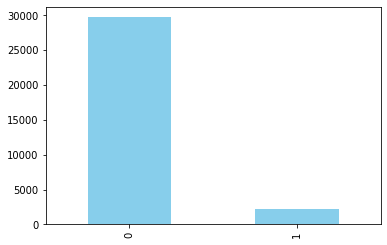

In [0]:
df['label'].value_counts().plot.bar(color = 'skyblue', figsize = (6, 4))

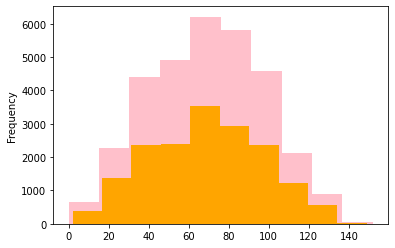

In [0]:
# checking the distribution of tweets in the data

length_train = df['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = df1['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

Let's see which are the top 30 most used words in the tweet.

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

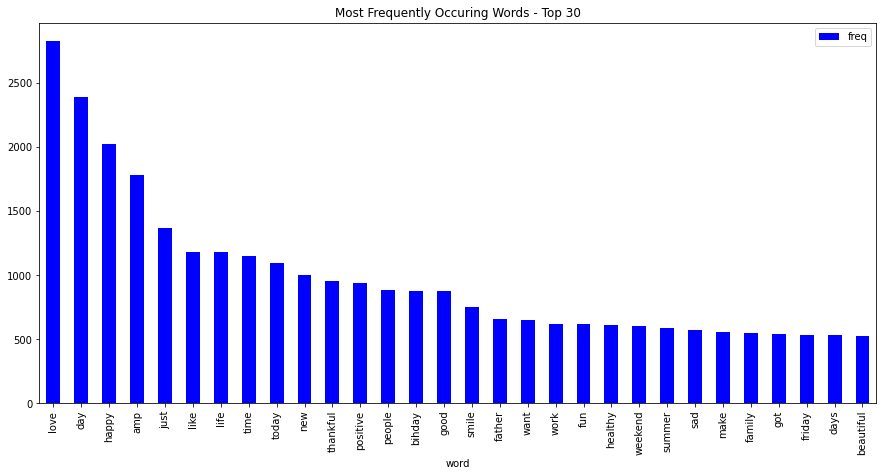

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Now ,we have used word cloud visualization for checking the most frequently used words after lemmetization.

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data, the bigger and bolder it appears in the word cloud.

Let's see which are the commonly used words in racist and non-racist datapoints in column tweet_lemm.

In [0]:
from wordcloud import WordCloud

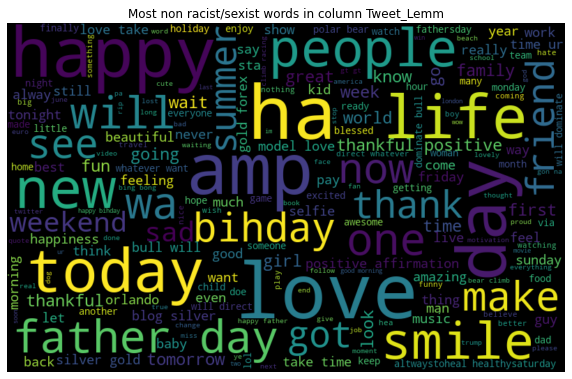

In [0]:
normal_words =' '.join([text for text in df['tweet_lemm'][df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet_Lemm")
plt.show()

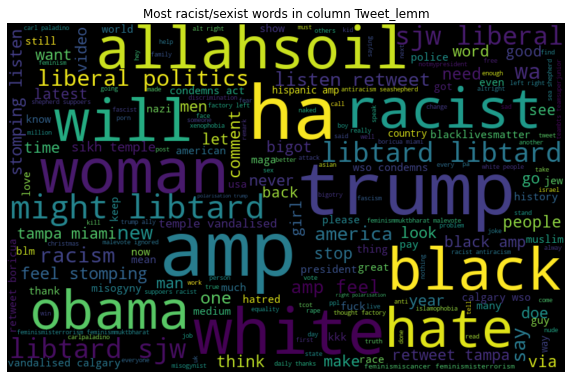

In [0]:
normal_words =' '.join([text for text in df['tweet_lemm'][df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column Tweet_lemm")
plt.show()

All these words are repeated alot of times in the selected column.The words which are
highlighted and are of high font size are repeated most number of times in tweet_lemm column.

# **EXTRACTING FEATURES**

We have used **TF-IDF**, a very common algorithm to transform text into a meaningful representation of numbers. This technique is widely used to extract features across various NLP applications.This aims to define the importance of a keyword or phrase within a document or a web page.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
#import necessary library

In [0]:
tfidf = TfidfVectorizer()
tfidf1=TfidfVectorizer()
tfidf.fit(df['tweet_lemm'].values)
tfidf1.fit(df1['tweet_lemm'].values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

We have only used the column "tweet_lemm" for tfidf vectorization.I used stemming to only show how different methods work for data cleaning process. 

In [0]:
target = np.array(df['label'], dtype='int')
#Initialise the target 

I have used Bag of Words (BOW) to extract features from text documents. These features can be used for training.It creates a vocabulary of all the unique words occurring in all the documents in the training set.

In [0]:
bag_of_words = tfidf.transform(df['tweet_lemm'].values)#train dataset
bag_of_words1=tfidf1.transform(df1['tweet_lemm'].values)#test dataset

In [0]:
bag_of_words = bag_of_words.toarray()
#of train dataset

In [0]:
bag_of_words.shape
#shape of train dataset

(31962, 35221)

In [0]:
bag_of_words1=bag_of_words1.toarray()
#of test dataset

In [0]:
bag_of_words1.shape
#shape of test dataset

(17197, 23918)

Using truncated SVD to reduce dimensionality.

 This is very similar to PCA, excepting that the factorization for SVD is done on the data matrix, whereas for PCA, the factorization is done on the covariance matrix. Typically, SVD is used under the hood to find the principle components of a matrix.

In [0]:
from sklearn.decomposition import TruncatedSVD
#n_components:Desired dimensionality of output data. Must be strictly less than the number of features.
#The default value is useful for visualisation.
tsvd = TruncatedSVD(n_components=220)
tsvd.fit(bag_of_words)
scaled = tsvd.transform(bag_of_words)
print(scaled.shape)

(31962, 220)


In [0]:
from sklearn.decomposition import TruncatedSVD
#n_components:Desired dimensionality of output data. Must be strictly less than the number of features.
#The default value is useful for visualisation.
tsvd1 = TruncatedSVD(n_components=220)
tsvd1.fit(bag_of_words1)
scaled1 = tsvd1.transform(bag_of_words1)
print(scaled1.shape)

(17197, 220)


In [0]:
model = keras.models.Sequential([
        keras.layers.Dense(100, input_shape=(220,), activation='relu'),
        keras.layers.Dense(60, activation='relu'),
        keras.layers.Dense(2, activation='softmax')
])

Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.

Optimizers help to get results faster.I have used Adam optimizer here.

In [0]:
model.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

**TRAINING**

In [0]:
model.fit(scaled, target, epochs=50, verbose=1, validation_split=0.1)

Epoch 1/50
899/899 [==============================] - 2s 2ms/step - loss: 0.3227 - accuracy: 0.9268 - val_loss: 0.2188 - val_accuracy: 0.9287
Epoch 2/50
899/899 [==============================] - 1s 2ms/step - loss: 0.2018 - accuracy: 0.9303 - val_loss: 0.1877 - val_accuracy: 0.9321
Epoch 3/50
899/899 [==============================] - 1s 2ms/step - loss: 0.1752 - accuracy: 0.9358 - val_loss: 0.1674 - val_accuracy: 0.9362
Epoch 4/50
899/899 [==============================] - 1s 2ms/step - loss: 0.1605 - accuracy: 0.9404 - val_loss: 0.1595 - val_accuracy: 0.9443
Epoch 5/50
899/899 [==============================] - 1s 2ms/step - loss: 0.1538 - accuracy: 0.9430 - val_loss: 0.1558 - val_accuracy: 0.9440
Epoch 6/50
899/899 [==============================] - 1s 2ms/step - loss: 0.1495 - accuracy: 0.9437 - val_loss: 0.1545 - val_accuracy: 0.9440
Epoch 7/50
899/899 [==============================] - 1s 2ms/step - loss: 0.1464 - accuracy: 0.9443 - val_loss: 0.1526 - val_accuracy: 0.9440
Epoch 

As we can see,our validation accuracy hit **94%.**

Let's visualize the deviation between loss and validation loss.

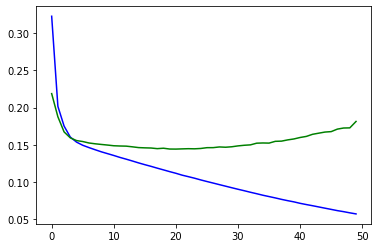

In [0]:
import matplotlib.pyplot as plt

plt.plot(model.history.epoch, model.history.history['loss'],'b',
         model.history.epoch, model.history.history['val_loss'], 'g')

Let's visualize the deviation between accuracy and validation accuracy.

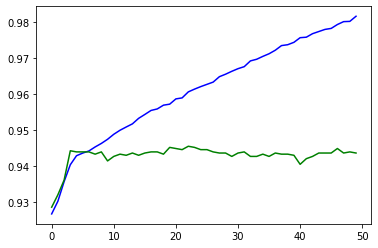

In [0]:
plt.plot(model.history.epoch, model.history.history['accuracy'],'b',
         model.history.epoch, model.history.history['val_accuracy'], 'g')

**PREDICTING LABEL FROM TEST DATASET**

In [0]:
scaled1.shape

(17197, 220)

Argmax is most commonly used in machine learning for finding the class with the largest predicted probability

In [0]:
np.argmax(model.predict(scaled1[1:5]))
#Returns indices of the max element of the array in a particular axis.

2

In [0]:
target[1]

0

# **CONCLUSION**

Using the TWITER DATASET we tried to predict the hate speeches in tweets.As our dataset had only raw sentences in the beginning, we started with preprocessing and exploration of data.Then we extracted features from the cleaned text using Bag-of-Words and TF-IDF.After that,we used **KERAS** model to train the dataset and  got an accuracy of **94** percent.And we also predicted the label in our test dataset.

Here,we could successfully do natural language processing and get the desired output(twitter sentiment analysis) from the tweets.Finally,we have learned how to approach  sentiment analysis problems having raw data .